In [17]:
%pip install pandas
%pip install sklearn 


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip




  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [18]:
''' Discard all warnings in Jupyter Notebook'''
import warnings
warnings.filterwarnings('ignore')

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
dftrain = pd.read_csv("Data/FINAL_CSV/train70_reduced.csv") 
dftrain_roc = dftrain
dftrain = dftrain[0:14000]
dftrain.head()

,tcp.flags,tcp.time_delta,tcp.len,mqtt.conack.flags,mqtt.conack.flags.reserved,mqtt.conack.flags.sp,mqtt.conack.val,mqtt.conflag.cleansess,mqtt.conflag.passwd,mqtt.conflag.qos,...,mqtt.qos,mqtt.retain,mqtt.sub.qos,mqtt.suback.qos,mqtt.ver,mqtt.willmsg,mqtt.willmsg_len,mqtt.willtopic,mqtt.willtopic_len,target
0,0x00000018,0.998867,10,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimate
1,0x00000010,0.000067,1460,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
2,0x00000010,0.000058,1460,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
3,0x00000018,0.000227,10,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimate
4,0x00000018,0.000236,16,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos


In [21]:
dftest = pd.read_csv("Data/FINAL_CSV/test30_reduced.csv")
dftest_roc = dftest
# dftest = dftest[0:36000]
dftest.head()

,tcp.flags,tcp.time_delta,tcp.len,mqtt.conack.flags,mqtt.conack.flags.reserved,mqtt.conack.flags.sp,mqtt.conack.val,mqtt.conflag.cleansess,mqtt.conflag.passwd,mqtt.conflag.qos,...,mqtt.qos,mqtt.retain,mqtt.sub.qos,mqtt.suback.qos,mqtt.ver,mqtt.willmsg,mqtt.willmsg_len,mqtt.willtopic,mqtt.willtopic_len,target
0,0x00000014,0.029854,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malformed
1,0x00000018,0.000001,51,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
2,0x00000018,0.999820,13,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimate
3,0x00000012,0.007949,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malformed
4,0x00000010,0.000121,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos


In [22]:
encoder = LabelEncoder()
dftrain['target'] = encoder.fit_transform(dftrain['target'])
encoder.classes_

array(['bruteforce', 'ddos', 'flood', 'legitimate', 'malformed',
       'slowite'], dtype=object)

In [23]:
for column in dftrain.columns:
    if dftrain[column].dtype == type(object):
        labelencoder = LabelEncoder()
        dftrain[column] = labelencoder.fit_transform(dftrain[column])

X_train = dftrain.drop("target",axis = 'columns')
y_train = dftrain["target"]

In [24]:
for column in dftest.columns:
    if dftest[column].dtype == type(object):
        labelencoder = LabelEncoder()
        dftest[column] = labelencoder.fit_transform(dftest[column])

X_test = dftest.drop("target",axis = 'columns')
y_test = dftest["target"]

In [25]:
from sklearn.preprocessing import MinMaxScaler

# Inicjalizacja obiektu skalera
scaler = MinMaxScaler()

# Dopasowanie skalera do danych i przekształcenie danych
# X_test = scaler.fit_transform(X_test)
# X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)
# y_test = scaler.fit_transform(y_test)
# y_test = pd.DataFrame(scaler.fit_transform(y_test), columns=y_test.columns)

In [26]:
svm = SVC(kernel='poly', cache_size=500)  # Możesz zmienić funkcję jądra na 'rbf', 'poly', itp., w zależności od potrzeb
svm.fit(X_train, y_train)
accuracy = svm.score(X_test, y_test)
print("Dokładność modelu SVM:", accuracy)
# Użyj modelu SVM, który został już wytrenowany
y_pred = svm.predict(X_test)


y_test_labels = encoder.inverse_transform(y_test)
y_pred_labels = encoder.inverse_transform(y_pred)

# Generowanie raportu klasyfikacji
clf_report = classification_report(y_test, y_pred, target_names=encoder.classes_)
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels, labels=encoder.classes_)

print(f"Classification Report:\n{clf_report}")
print(f"Confusion Matrix:\n{conf_matrix}")
print("#"*150)

Dokładność modelu SVM: 0.7470842985194883
Classification Report:
              precision    recall  f1-score   support

  bruteforce       0.00      0.00      0.00      4351
        ddos       0.98      0.67      0.80     39077
       flood       1.00      0.39      0.56       184
  legitimate       0.69      0.95      0.80     49639
   malformed       0.11      0.15      0.13      3278
     slowite       1.00      0.14      0.25      2761

    accuracy                           0.75     99290
   macro avg       0.63      0.38      0.42     99290
weighted avg       0.77      0.75      0.73     99290

Confusion Matrix:
[[    0     3     0  4306    42     0]
 [    0 26101     0 11211  1765     0]
 [    0    14    72    97     1     0]
 [    0   413     0 47121  2105     0]
 [    0     5     0  2786   487     0]
 [    0     0     0  2364     0   397]]
###########################################################################################################################################

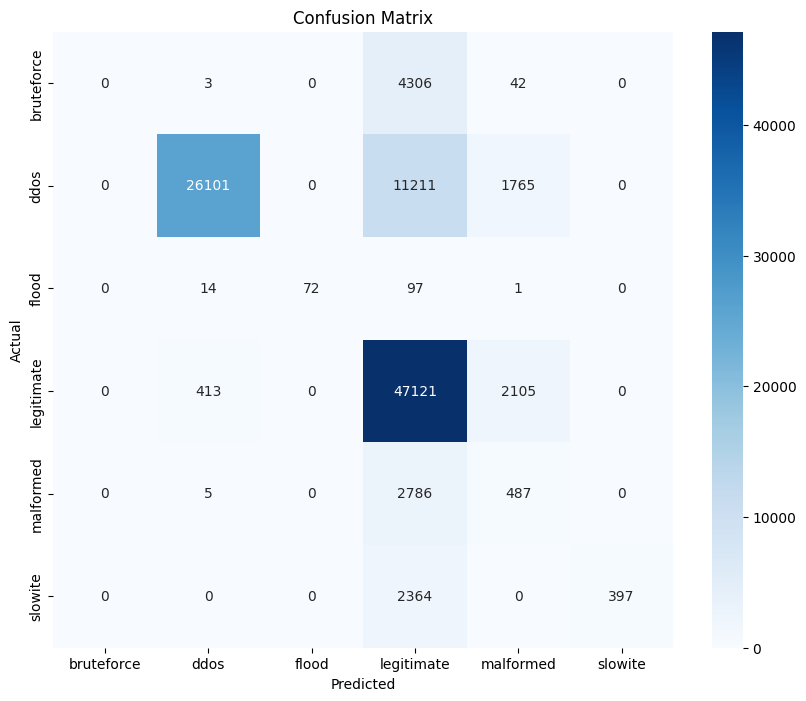

In [27]:
# Wizualizacja macierzy pomyłek
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [28]:
svm = SVC(kernel='rbf', cache_size=500)  # Możesz zmienić funkcję jądra na 'rbf', 'poly', itp., w zależności od potrzeb
svm.fit(X_train, y_train)
accuracy = svm.score(X_test, y_test)
print("Dokładność modelu SVM:", accuracy)
# Użyj modelu SVM, który został już wytrenowany
y_pred = svm.predict(X_test)

y_test_labels = encoder.inverse_transform(y_test)
y_pred_labels = encoder.inverse_transform(y_pred)

# Generowanie raportu klasyfikacji
clf_report = classification_report(y_test, y_pred, target_names=encoder.classes_)
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels, labels=encoder.classes_)

print(f"Classification Report:\n{clf_report}")
print(f"Confusion Matrix:\n{conf_matrix}")
print("#"*150)

Dokładność modelu SVM: 0.7057911169302045
Classification Report:
              precision    recall  f1-score   support

  bruteforce       0.00      0.00      0.00      4351
        ddos       0.99      0.57      0.73     39077
       flood       0.01      0.43      0.03       184
  legitimate       0.69      0.95      0.80     49639
   malformed       0.01      0.01      0.01      3278
     slowite       1.00      0.14      0.25      2761

    accuracy                           0.71     99290
   macro avg       0.45      0.35      0.30     99290
weighted avg       0.77      0.71      0.69     99290

Confusion Matrix:
[[    0     6    41  4303     1     0]
 [    0 22462  5404 11211     0     0]
 [    0     9    79    96     0     0]
 [    0   136     0 47121  2382     0]
 [    0    12   468  2779    19     0]
 [    0     0     0  2364     0   397]]
###########################################################################################################################################

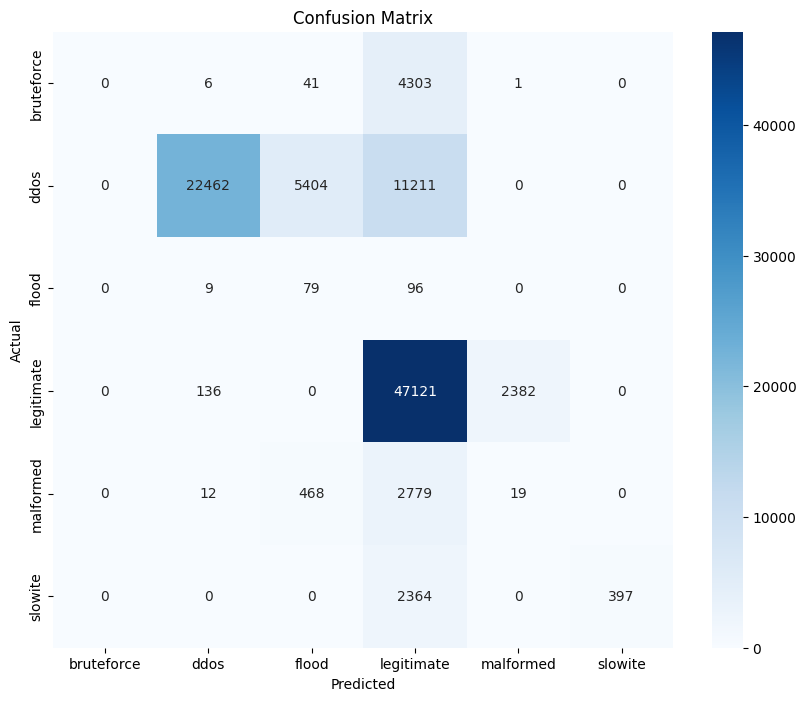

In [29]:
# Wizualizacja macierzy pomyłek
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [30]:
svm = SVC(kernel='linear', cache_size=500)  # Możesz zmienić funkcję jądra na 'rbf', 'poly', itp., w zależności od potrzeb
svm.fit(X_train, y_train)
accuracy = svm.score(X_test, y_test)
print("Dokładność modelu SVM:", accuracy)
# Użyj modelu SVM, który został już wytrenowany
y_pred = svm.predict(X_test)

y_test_labels = encoder.inverse_transform(y_test)
y_pred_labels = encoder.inverse_transform(y_pred)

# Generowanie raportu klasyfikacji
clf_report = classification_report(y_test, y_pred, target_names=encoder.classes_)
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels, labels=encoder.classes_)

print(f"Classification Report:\n{clf_report}")
print(f"Confusion Matrix:\n{conf_matrix}")
print("#"*150)

Dokładność modelu SVM: 0.7765132440326317
Classification Report:
              precision    recall  f1-score   support

  bruteforce       0.76      0.29      0.42      4351
        ddos       0.97      0.71      0.82     39077
       flood       1.00      0.27      0.42       184
  legitimate       0.73      0.94      0.82     49639
   malformed       0.14      0.18      0.16      3278
     slowite       0.74      0.29      0.42      2761

    accuracy                           0.78     99290
   macro avg       0.72      0.45      0.51     99290
weighted avg       0.81      0.78      0.77     99290

Confusion Matrix:
[[ 1255   420     0  2617    58     1]
 [    0 27866     0 11211     0     0]
 [    0     6    49    95     0    34]
 [    2     0     0 46549  3088     0]
 [  287   297     0  1870   580   244]
 [  115   123     0  1324   398   801]]
###########################################################################################################################################

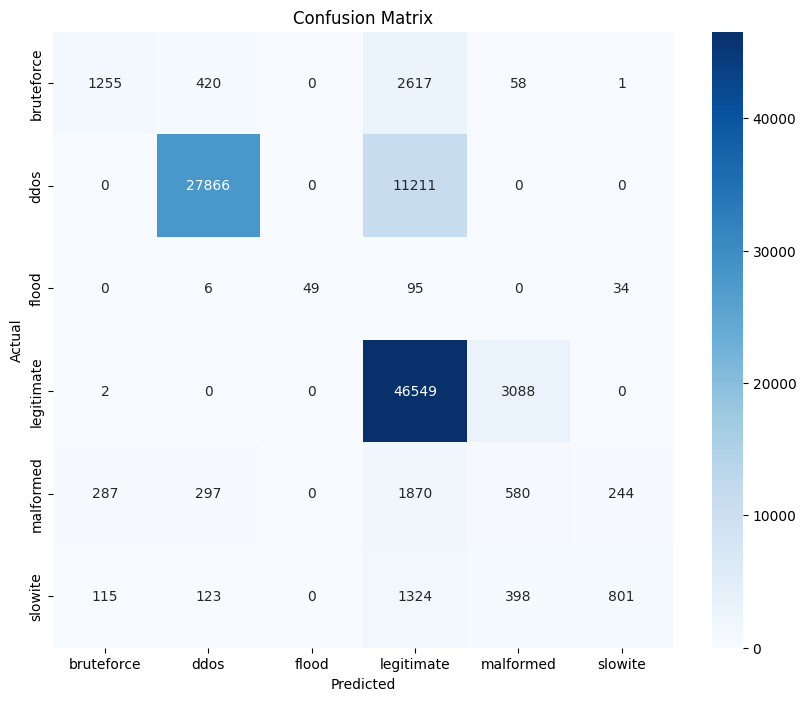

In [31]:
# Wizualizacja macierzy pomyłek
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [32]:
svm = SVC(kernel='sigmoid', random_state=42)
svm.fit(X_train, y_train)
accuracy = svm.score(X_test, y_test)
print("Dokładność modelu SVM:", accuracy)
# Użyj modelu SVM, który został już wytrenowany
y_pred = svm.predict(X_test)

y_test_labels = encoder.inverse_transform(y_test)
y_pred_labels = encoder.inverse_transform(y_pred)

# Generowanie raportu klasyfikacji
clf_report = classification_report(y_test, y_pred, target_names=encoder.classes_)
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels, labels=encoder.classes_)

print(f"Classification Report:\n{clf_report}")
print(f"Confusion Matrix:\n{conf_matrix}")
print("#"*150)

Dokładność modelu SVM: 0.7508611139087521
Classification Report:
              precision    recall  f1-score   support

  bruteforce       0.00      0.00      0.00      4351
        ddos       1.00      0.63      0.77     39077
       flood       0.43      0.02      0.03       184
  legitimate       0.67      1.00      0.80     49639
   malformed       0.00      0.00      0.00      3278
     slowite       0.97      0.14      0.25      2761

    accuracy                           0.75     99290
   macro avg       0.51      0.30      0.31     99290
weighted avg       0.75      0.75      0.71     99290

Confusion Matrix:
[[    0     7     0  4344     0     0]
 [    0 24514     0 14563     0     0]
 [   49    37     3    95     0     0]
 [    0     0     0 49639     0     0]
 [    0    54     4  3207     0    13]
 [    0     0     0  2364     0   397]]
###########################################################################################################################################

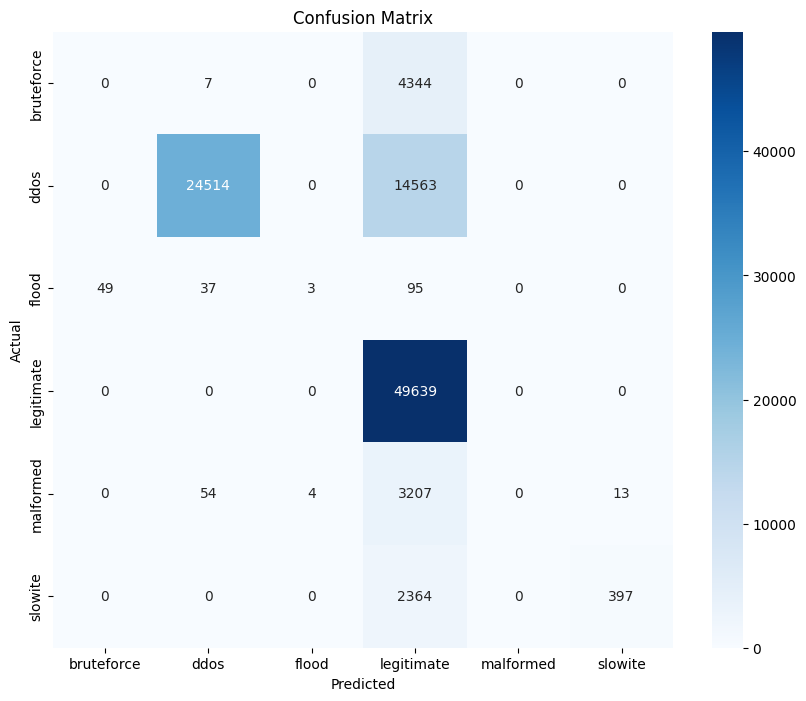

In [33]:
# Wizualizacja macierzy pomyłek
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()